# Data cleaning, first visualizations, and insights on the *womencountUSA* dataset

### Imports

We work with python, on a collab notebook.

In [1]:
from google.colab import drive

drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [3]:
from typing import Union

## Antlr part

In the MyDrive dir, I placed all my parsers.

The ages parser is in the `DataVizEPFL/grammer_age` dir, and the parser for the health status and cause of death of the suspect is in `DataVizEPFL/grammer_cause`.

In [4]:
%cp -r /content/drive/MyDrive/DataVizEPFL/* ./

We import the relevant python package, in order to be able to use the antlr module.

In [5]:
%pip install antlr4-python3-runtime

     |████████████████████████████████| 117 kB 5.2 MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144575 sha256=5c8a20df1a88558921465df93dd0a3abd8e0d0d5d1fa3c201f6a7fc7e770abd7
  Stored in directory: /root/.cache/pip/wheels/8b/8d/53/2af8772d9aec614e3fc65e53d4a993ad73c61daa8bbd85a873
Successfully built antlr4-python3-runtime


In [6]:
import sysconfig
import grammer_age.age_parse as grammer_age
import grammer_cause.cause_parse as grammer_cause

## Load the csv table with `pandas`:

In [10]:
converters = {
    "HER AGE": grammer_age.parse_data,
    "HIS AGE": grammer_age.parse_data,
    "MURDER-SUICIDE / FAMILICIDE / SUSPECT DEATH": grammer_cause.parse_data
}
table = pd.read_csv('/content/drive/MyDrive/DataVizEPFL/dataset.csv',
                    header=1,
                    converters=converters,
                    na_values="NaN"
                    )

# Ages are expressed in days to be exact,
# but for viz we only need years
table["HER AGE"] /= 365.
table["HIS AGE"] /= 365.

## Show some preliminary results:

We compare the distributions of ages to each others:

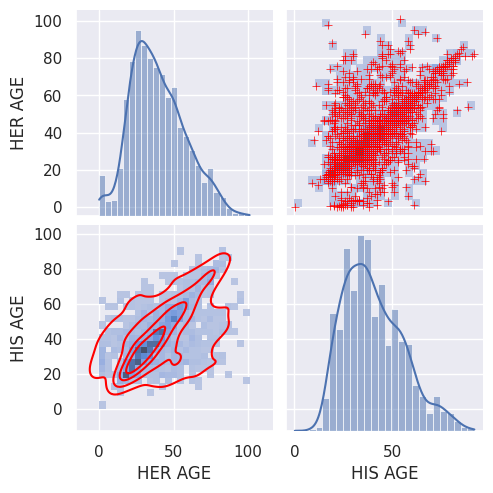

In [38]:
ax = sb.pairplot(
    table,
    x_vars=["HER AGE", "HIS AGE"], # compare ages between genres
    y_vars=["HER AGE", "HIS AGE"],
    #plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(kde=True),
    kind="hist"
    )
ax.map_lower(sb.kdeplot, levels=5, color="red")
ax.map_upper(sb.scatterplot, marker="+", linewidth=.5, color="red")
pass

Then we try to fit a linear regression, and see that the ages of the suspects and the ages of the victims are closely related.

A large cluster is constituted of victim-suspect pairs of equal ages.

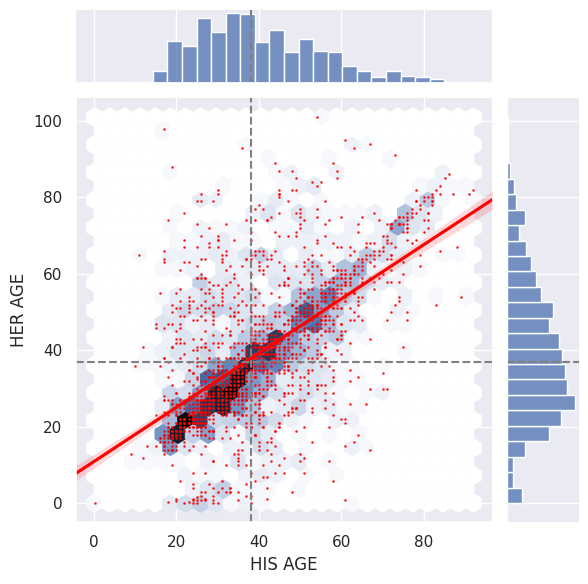

In [57]:
ax = sb.jointplot(data=table, kind='hex', x="HIS AGE", y="HER AGE")
ax.plot_joint(sb.regplot, marker=".", color="red", scatter_kws={"s": 3}, truncate=False)
ax.refline(y=table["HER AGE"].median())
ax.refline(x=table["HIS AGE"].median())
pass

Here are the distribution of ages, more clearly:

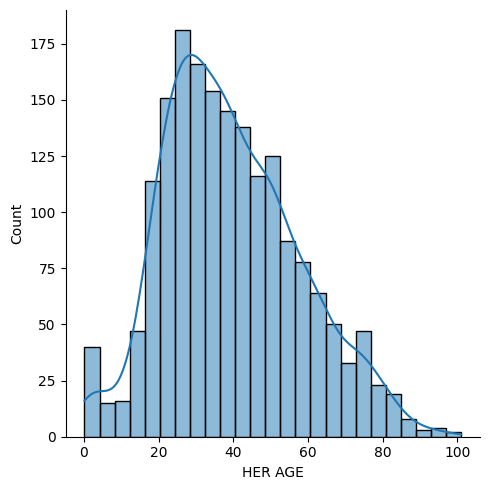

In [61]:
sb.displot(data=table, x="HER AGE", kde=True)
pass

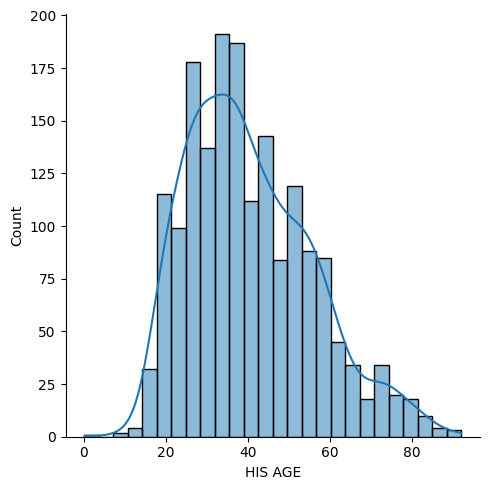

In [62]:
sb.displot(data=table, x="HIS AGE", kde=True)
pass

To see the influence of the age of the suspect on is health status, we make the following violin plot.

We observe that younger suspects are more likely to survive, and older people die for unknown reasons or are more likely to get killed by the police, either during interpelation or during jail/custody time.

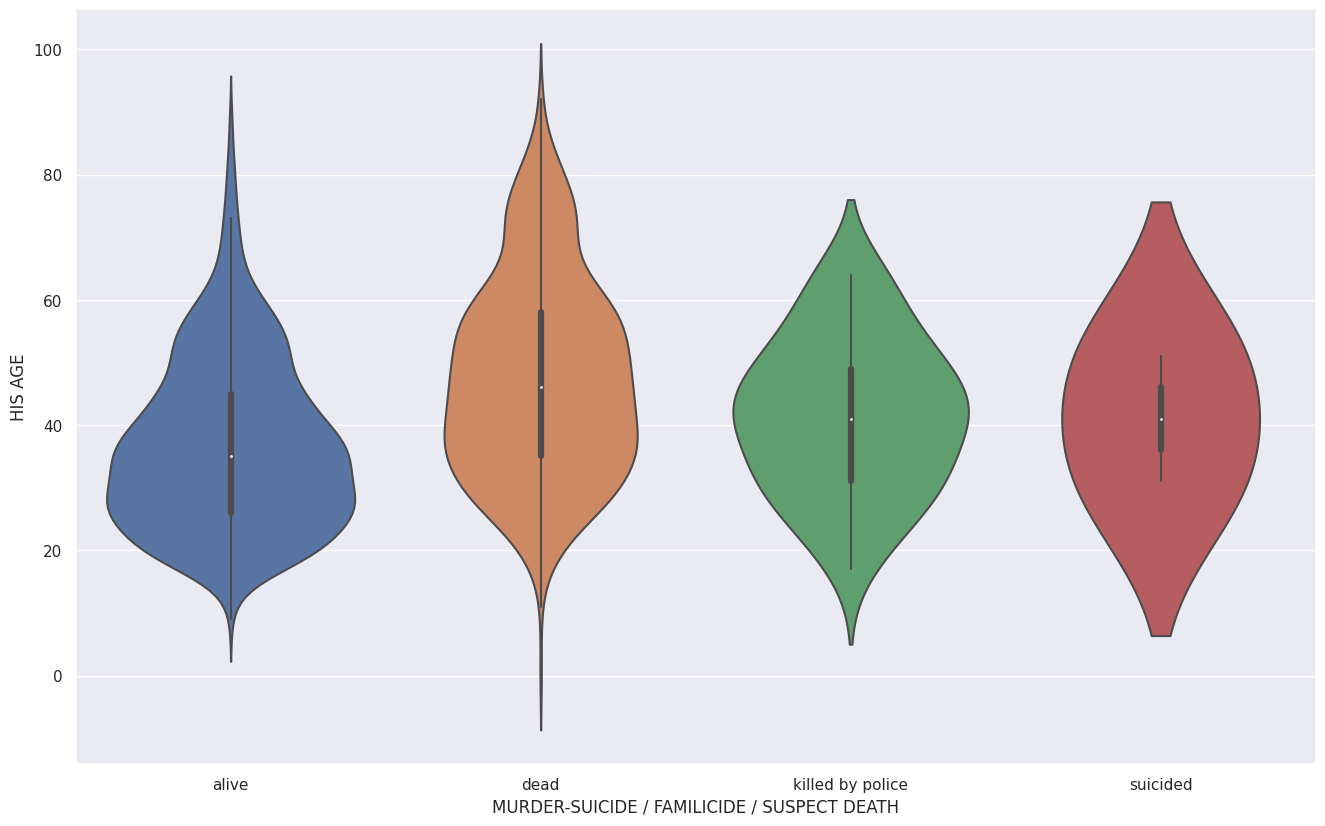

In [21]:
sb.set_theme()
sb.violinplot(data=table, x="MURDER-SUICIDE / FAMILICIDE / SUSPECT DEATH", y="HIS AGE")
pass

Here are the relevant statistics on ages:

In [19]:
table["HER AGE"].describe()

count    1826.000000
mean       39.525259
std        18.089633
min         0.134247
25%        26.000000
50%        37.000000
75%        51.000000
max       101.000000
Name: HER AGE, dtype: float64

In [20]:
table["HIS AGE"].describe()

count    1763.000000
mean       40.523097
std        15.297765
min         0.219178
25%        29.000000
50%        38.000000
75%        51.000000
max        92.000000
Name: HIS AGE, dtype: float64